# Adding a layer to a NN

## Exemple : the Fibonacci sequence

In [ ]:
# source : https://mkai.org/adding-a-custom-attention-layer-to-recurrent-neural-network-in-keras-2/

## Creation of a 4 unit layer-Neural Network

In [ ]:
# source : https://datascience-enthusiast.com/DL/Building-your-Deep-Neural-Network-Step-by-Step.html#4.1---Linear-Forward
# https://python-course.eu/machine-learning/neural-networks-structure-weights-and-matrices.php


In [ ]:
#Packages

import numpy as np
import h5py
import matplotlib.pyplot as plt
from testCases_v2 import *
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [ ]:
conda install testCases_v2

In [ ]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters 

In [ ]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] =  np.zeros((layer_dims[l], 1))
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [ ]:
# source : https://towardsdatascience.com/building-neural-network-using-pytorch-84f6e75f9a

In [ ]:
import tensorflow

In [ ]:
from torch import nn
class Network(nn.Module):
        def __init__(self):
            super().__init__()
        
            # Inputs to hidden layer linear transformation
            self.hidden = nn.Linear(784, 256)
            # Output layer, 10 units - one for each digit
            self.output = nn.Linear(256, 10)
            
            # Define sigmoid activation and softmax output 
            self.sigmoid = nn.Sigmoid()
            self.softmax = nn.Softmax(dim=1)
        
        def forward(self, x):
            # Pass the input tensor through each of our operations
            x = self.hidden(x)
            x = self.sigmoid(x)
            x = self.output(x)
            x = self.softmax(x)
        
            return x

In [ ]:
!conda install torch

In [ ]:
!pip freeze

In [ ]:
# source : https://www.freecodecamp.org/news/building-a-neural-network-from-scratch/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def init_params(layer_dims):
    np.random.seed(3)
    params = {}
    L = len(layer_dims)
    
    for l in range(1, L):
        params['W'+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
        params['b'+str(l)] = np.zeros((layer_dims[l], 1))
        
    return params

In [ ]:
# Z (linear hypothesis) - Z = W*X + b , 
# W - weight matrix, b- bias vector, X- Input 

def sigmoid(Z):
    A = 1/(1+np.exp(np.dot(-1, Z)))
    cache = (Z)
    
    return A, cache

In [ ]:
def forward_prop(X, params):
    
    A = X # input to first layer i.e. training data
    caches = []
    L = len(params)//2
    for l in range(1, L+1):
        A_prev = A
        
        # Linear Hypothesis
        Z = np.dot(params['W'+str(l)], A_prev) + params['b'+str(l)] 
        
        # Storing the linear cache
        linear_cache = (A_prev, params['W'+str(l)], params['b'+str(l)]) 
        
        # Applying sigmoid on linear hypothesis
        A, activation_cache = sigmoid(Z) 
        
         # storing the both linear and activation cache
        cache = (linear_cache, activation_cache)
        caches.append(cache)
    
    return A, caches

In [ ]:
def cost_function(A, Y):
    m = Y.shape[1]
    
    cost = (-1/m)*(np.dot(np.log(A), Y.T) + np.dot(log(1-A), 1-Y.T)) 
    
    return cost

In [ ]:
def one_layer_backward(dA, cache):
    linear_cache, activation_cache = cache
    
    Z = activation_cache
    dZ = dA*sigmoid(Z)*(1-sigmoid(Z)) # The derivative of the sigmoid function
    
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]
    
    dW = (1/m)*np.dot(dZ, A_prev.T)
    db = (1/m)*np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

In [ ]:
def backprop(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = -(np.divide(Y, AL) - np.divide(1-Y, 1-AL))
    
    current_cache = caches[L-1]
    grads['dA'+str(L-1)], grads['dW'+str(L-1)], grads['db'+str(L-1)] = one_layer_backward(dAL, current_cache)
    
    for l in reversed(range(L-1)):
        
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = one_layer_backward(grads["dA" + str(l+1)], current_cache)
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        
    return grads

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    
    for l in range(L):
        parameters['W'+str(l+1)] = parameters['W'+str(l+1)] -learning_rate*grads['W'+str(l+1)]
        parameters['b'+str(l+1)] = parameters['b'+str(l+1)] -  learning_rate*grads['b'+str(l+1)]
        
    return parameters

In [ ]:
def train(X, Y, layer_dims, epochs, lr): # X = training data
    params = init_params(layer_dims)
    cost_history = []
    
    for i in range(epochs):
        Y_hat, caches = forward_prop(X, params)
        cost = cost_function(Y_hat, Y)
        cost_history.append(cost)
        grads = backprop(Y_hat, Y, caches)
        
        params = update_parameters(params, grads, lr)
        
        
    return params, cost_history

In [ ]:
train(,,4,5,)

In [ ]:
# source : https://www.activestate.com/resources/quick-reads/how-to-create-a-neural-network-in-python-with-and-without-keras/

In [ ]:
# Import python libraries required in this example:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

# Use numpy arrays to store inputs (x) and outputs (y):
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]]) 

# Define the network model and its arguments. 
# Set the number of neurons/nodes for each layer:
model = Sequential()
model.add(Dense(2, input_shape=(2,)))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid')) 

# Compile the model and calculate its accuracy:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy']) 

# Print a summary of the Keras model:
model.summary()

In [ ]:
# creation of inputs
x_inputs = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])


# Image segmentation with U-Net

In [ ]:
# source : https://medium.com/geekculture/u-net-implementation-from-scratch-using-tensorflow-b4342266e406

## 1 - Packages

In [1]:
# for data load
import os

# for reading and processing images
import imageio
from PIL import Image

# for visualizations
import matplotlib.pyplot as plt

import numpy as np # for using np arrays

# for bulding and running deep learning model
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras.losses import binary_crossentropy
from sklearn.model_selection import train_test_split

2023-05-04 12:08:44.370333: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 12:08:44.795558: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mamo/devel/build/INSTALL/lib:/home/mamo/devel/build/INSTALL/lib64::
2023-05-04 12:08:44.795603: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-04 12:08:46.294303: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7

## 2 - Helper Functions for Data Processing

In [2]:
def LoadData (path1, path2):
    """
    Looks for relevant filenames in the shared path
    Returns 2 lists for original and masked files respectively
    
    """
    # Read the images folder like a list
    image_dataset = os.listdir(path1)
    mask_dataset = os.listdir(path2)

    # Make a list for images and masks filenames
    orig_img = []
    mask_img = []
    for file in image_dataset:
        orig_img.append(file)
    for file in mask_dataset:
        mask_img.append(file)

    # Sort the lists to get both of them in same order (the dataset has exactly the same name for images and corresponding masks)
    orig_img.sort()
    mask_img.sort()
    
    return orig_img, mask_img

In [3]:
def LoadData_2 (path1, path2):
    """
    Looks for relevant filenames in the shared path
    Returns 2 lists for original and masked files respectively
    
    """
    # Read the images folder like a list
    image_dataset = os.listdir(path1)
    mask_dataset = os.listdir(path2)

    # Make a list for images and masks filenames
    orig_img = []
    mask_img = []
    for file in image_dataset:
        orig_img.append(file)
    for file in mask_dataset:
        if not file.startswith("."):
            mask_img.append(file)

    # Sort the lists to get both of them in same order (the dataset has exactly the same name for images and corresponding masks)
    orig_img.sort()
    mask_img.sort()
    
    return orig_img, mask_img

In [4]:
def PreprocessData(img, mask, target_shape_img, target_shape_mask, path1, path2):
    """
    Processes the images and mask present in the shared list and path
    Returns a NumPy dataset with images as 3-D arrays of desired size
    Please note the masks in this dataset have only one channel
    """
    # Pull the relevant dimensions for image and mask
    m = len(img)                     # number of images
    i_h,i_w,i_c = target_shape_img   # pull height, width, and channels of image
    m_h,m_w,m_c = target_shape_mask  # pull height, width, and channels of mask
    
    # Define X and Y as number of images along with shape of one image
    X = np.zeros((m,i_h,i_w,i_c), dtype=np.float32)
    y = np.zeros((m,m_h,m_w,m_c), dtype=np.int32)
    
    # Resize images and masks
    for file in img:
        # convert image into an array of desired shape (3 channels)
        index = img.index(file)
        path = os.path.join(path1, file)
        single_img = Image.open(path).convert('RGB')
        single_img = single_img.resize((i_h,i_w))
        single_img = np.reshape(single_img,(i_h,i_w,i_c)) 
        single_img = single_img/256.
        X[index] = single_img
        
        # convert mask into an array of desired shape (1 channel)
        single_mask_ind = mask[index]
        path = os.path.join(path2, single_mask_ind)
        single_mask = Image.open(path)
        single_mask = single_mask.resize((m_h, m_w))
        single_mask = np.reshape(single_mask,(m_h,m_w,m_c)) 
        single_mask = single_mask - 1 # to ensure classes #s start from 0
        y[index] = single_mask
    return X, y

## 3 - Constructing the U-Net Architecture

In [5]:
def EncoderMiniBlock(inputs, n_filters=32, dropout_prob=0.3, max_pooling=True):
    """
    This block uses multiple convolution layers, max pool, relu activation to create an architecture for learning. 
    Dropout can be added for regularization to prevent overfitting. 
    The block returns the activation values for next layer along with a skip connection which will be used in the decoder
    """
    # Add 2 Conv Layers with relu activation and HeNormal initialization using TensorFlow 
    # Proper initialization prevents from the problem of exploding and vanishing gradients 
    # 'Same' padding will pad the input to conv layer such that the output has the same height and width (hence, is not reduced in size) 
    conv = Conv2D(n_filters, 
                  3,   # Kernel size   
                  activation='relu',
                  padding='same',
                  kernel_initializer='HeNormal')(inputs)
    conv = Conv2D(n_filters, 
                  3,   # Kernel size
                  activation='relu',
                  padding='same',
                  kernel_initializer='HeNormal')(conv)
    
    # Batch Normalization will normalize the output of the last layer based on the batch's mean and standard deviation
    conv = BatchNormalization()(conv, training=False)

    # In case of overfitting, dropout will regularize the loss and gradient computation to shrink the influence of weights on output
    if dropout_prob > 0:     
        conv = tf.keras.layers.Dropout(dropout_prob)(conv)

    # Pooling reduces the size of the image while keeping the number of channels same
    # Pooling has been kept as optional as the last encoder layer does not use pooling (hence, makes the encoder block flexible to use)
    # Below, Max pooling considers the maximum of the input slice for output computation and uses stride of 2 to traverse across input image
    if max_pooling:
        next_layer = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv)    
    else:
        next_layer = conv

    # skip connection (without max pooling) will be input to the decoder layer to prevent information loss during transpose convolutions      
    skip_connection = conv
    
    return next_layer, skip_connection

In [6]:
def DecoderMiniBlock(prev_layer_input, skip_layer_input, n_filters=32):
    """
    Decoder Block first uses transpose convolution to upscale the image to a bigger size and then,
    merges the result with skip layer results from encoder block
    Adding 2 convolutions with 'same' padding helps further increase the depth of the network for better predictions
    The function returns the decoded layer output
    """
    # Start with a transpose convolution layer to first increase the size of the image
    up = Conv2DTranspose(
                 n_filters,
                 (3,3),    # Kernel size
                 strides=(2,2),
                 padding='same')(prev_layer_input)

    # Merge the skip connection from previous block to prevent information loss
    merge = concatenate([up, skip_layer_input], axis=3)
    
    # Add 2 Conv Layers with relu activation and HeNormal initialization for further processing
    # The parameters for the function are similar to encoder
    conv = Conv2D(n_filters, 
                 3,     # Kernel size
                 activation='relu',
                 padding='same',
                 kernel_initializer='HeNormal')(merge)
    conv = Conv2D(n_filters,
                 3,   # Kernel size
                 activation='relu',
                 padding='same',
                 kernel_initializer='HeNormal')(conv)
    return conv

In [7]:
def UNetCompiled(input_size=(128, 128, 3), n_filters=32, n_classes=3):
    """
   Combine both encoder and decoder blocks according to the U-Net research paper
   Return the model as output 
    """
    # Input size represent the size of 1 image (the size used for pre-processing) 
    inputs = Input(input_size)
    
    # Encoder includes multiple convolutional mini blocks with different maxpooling, dropout and filter parameters
    # Observe that the filters are increasing as we go deeper into the network which will increasse the # channels of the image 
    cblock1 = EncoderMiniBlock(inputs, n_filters,dropout_prob=0, max_pooling=True)
    cblock2 = EncoderMiniBlock(cblock1[0],n_filters*2,dropout_prob=0, max_pooling=True)
    cblock3 = EncoderMiniBlock(cblock2[0], n_filters*4,dropout_prob=0, max_pooling=True)
    cblock4 = EncoderMiniBlock(cblock3[0], n_filters*8,dropout_prob=0.3, max_pooling=True)
    cblock5 = EncoderMiniBlock(cblock4[0], n_filters*16, dropout_prob=0.3, max_pooling=False) 
    
    # Decoder includes multiple mini blocks with decreasing number of filters
    # Observe the skip connections from the encoder are given as input to the decoder
    # Recall the 2nd output of encoder block was skip connection, hence cblockn[1] is used
    ublock6 = DecoderMiniBlock(cblock5[0], cblock4[1],  n_filters * 8)
    ublock7 = DecoderMiniBlock(ublock6, cblock3[1],  n_filters * 4)
    ublock8 = DecoderMiniBlock(ublock7, cblock2[1],  n_filters * 2)
    ublock9 = DecoderMiniBlock(ublock8, cblock1[1],  n_filters)

    # Complete the model with 1 3x3 convolution layer (Same as the prev Conv Layers)
    # Followed by a 1x1 Conv layer to get the image to the desired size. 
    # Observe the number of channels will be equal to number of output classes
    conv9 = Conv2D(n_filters,
             3,
             activation='relu',
             padding='same',
             kernel_initializer='he_normal')(ublock9)

    conv10 = Conv2D(n_classes, 1, padding='same')(conv9)
    
    # Define the model
    model = tf.keras.Model(inputs=inputs, outputs=conv10)

    return model

## 4 - Executing above Functions to Train the Model

In [ ]:
img

In [ ]:
mask

In [ ]:
os.listdir(path2)

In [ ]:
os.listdir(path1)

/tmp/ipykernel_1295/2490232670.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_view  = imageio.imread(path1 + img[i])
/tmp/ipykernel_1295/2490232670.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_view = imageio.imread(path2 + mask[i])


(400, 600, 3)
(400, 600)


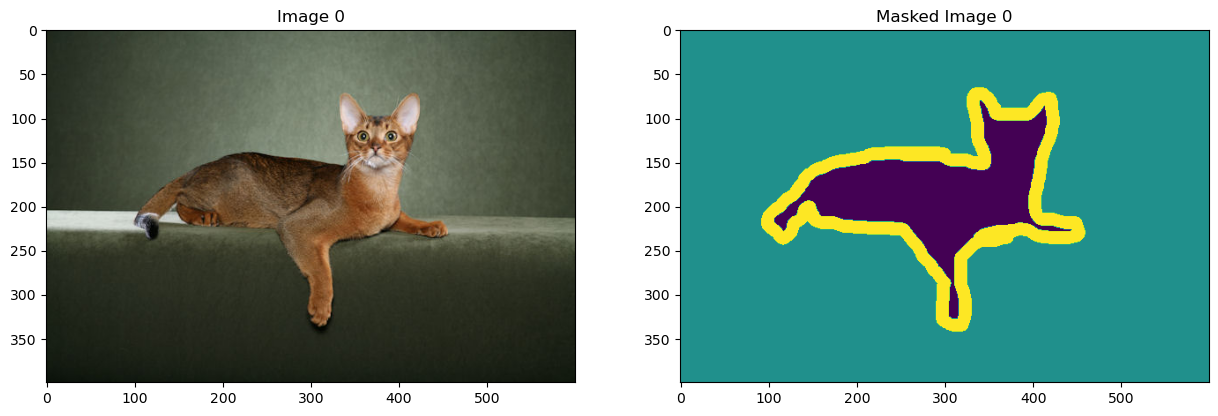

In [8]:
""" Load Train Set and view some examples """
# Call the apt function
path1 = '/mnt/imagingnas/data/Users/mct/Aurelie/PetDatabase/images/'
path2 = '/mnt/imagingnas/data/Users/mct/Aurelie/PetDatabase/annotations/trimaps/'
#img, mask = LoadData (path1, path2)
img, mask = LoadData_2 (path1, path2)


# View an example of image and corresponding mask 
show_images = 1
for i in range(show_images):
    img_view  = imageio.imread(path1 + img[i])
    mask_view = imageio.imread(path2 + mask[i])
    print(img_view.shape)
    print(mask_view.shape)
    fig, arr = plt.subplots(1, 2, figsize=(15, 15))
    arr[0].imshow(img_view)
    arr[0].set_title('Image '+ str(i))
    arr[1].imshow(mask_view)
    arr[1].set_title('Masked Image '+ str(i))



X Shape: (7390, 128, 128, 3)
Y shape: (7390, 128, 128, 1)
[0 1 2]


Text(0.5, 1.0, 'Processed Masked Image ')

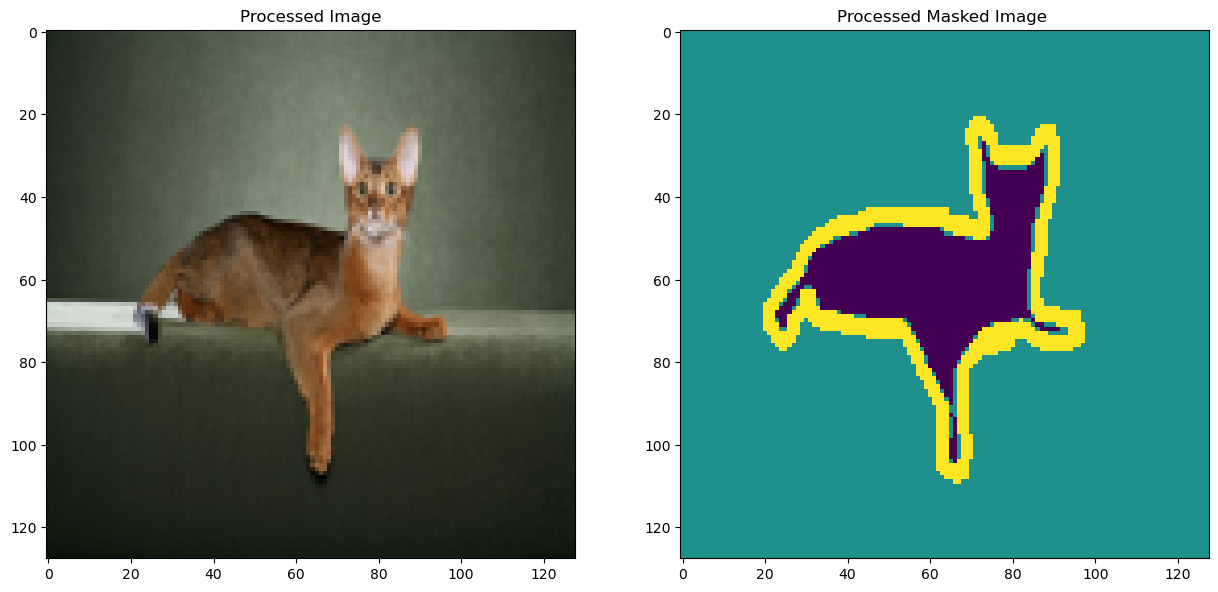

In [9]:
# Define the desired shape
target_shape_img = [128, 128, 3]
target_shape_mask = [128, 128, 1]

# Process data using apt helper function
X, y = PreprocessData(img, mask, target_shape_img, target_shape_mask, path1, path2)

# QC the shape of output and classes in output dataset 
print("X Shape:", X.shape)
print("Y shape:", y.shape)
# There are 3 classes : background, pet, outline
print(np.unique(y))

# Visualize the output
image_index = 0
fig, arr = plt.subplots(1, 2, figsize=(15, 15))
arr[0].imshow(X[image_index])
arr[0].set_title('Processed Image')
arr[1].imshow(y[image_index,:,:,0])
arr[1].set_title('Processed Masked Image ')

In [10]:
# Use scikit-learn's function to split the dataset
# Here, I have used 10% data as test/valid set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=123)

In [11]:
# Call the helper function for defining the layers for the model, given the input image size
unet = UNetCompiled(input_size=(128,128,3), n_filters=32, n_classes=3)

2023-05-04 12:11:02.640008: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mamo/devel/build/INSTALL/lib:/home/mamo/devel/build/INSTALL/lib64::
2023-05-04 12:11:02.640525: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mamo/devel/build/INSTALL/lib:/home/mamo/devel/build/INSTALL/lib64::
2023-05-04 12:11:02.640665: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mamo/devel/build/INSTALL/lib:/home/mamo/devel/build/INSTALL/lib64::

In [12]:
# Check the summary to better interpret how the output dimensions change in each layer
unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

In [13]:
# There are multiple optimizers, loss functions and metrics that can be used to compile multi-class segmentation models
# Ideally, try different options to get the best accuracy
unet.compile(optimizer=tf.keras.optimizers.Adam(), 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# Run the model in a mini-batch fashion and compute the progress for each epoch
results = unet.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
208/208 [==============================] - 791s 4s/step - loss: 0.5477 - accuracy: 0.7831 - val_loss: 0.4707 - val_accuracy: 0.8153
Epoch 2/5
208/208 [==============================] - 793s 4s/step - loss: 0.4537 - accuracy: 0.8238 - val_loss: 0.4185 - val_accuracy: 0.8365
Epoch 3/5
208/208 [==============================] - 792s 4s/step - loss: 0.4032 - accuracy: 0.8449 - val_loss: 0.4116 - val_accuracy: 0.8425
Epoch 4/5
208/208 [==============================] - 793s 4s/step - loss: 0.3711 - accuracy: 0.8578 - val_loss: 0.3697 - val_accuracy: 0.8606
Epoch 5/5
208/208 [==============================] - 793s 4s/step - loss: 0.3452 - accuracy: 0.8681 - val_loss: 0.3429 - val_accuracy: 0.8700


## 5 - Evaluate Model Results

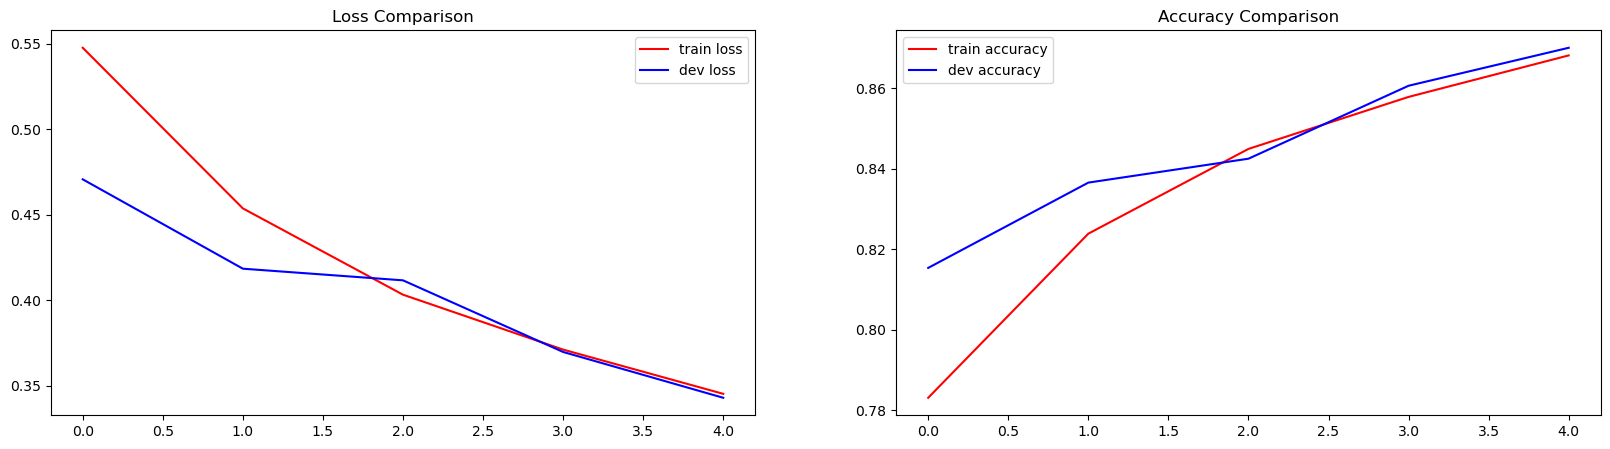

In [16]:
# High Bias is a characteristic of an underfitted model and we would observe low accuracies for both train and validation set
# High Variance is a characterisitic of an overfitted model and we would observe high accuracy for train set and low for validation set
# To check for bias and variance plit the graphs for accuracy 
# I have plotted for loss too, this helps in confirming if the loss is decreasing with each iteration - hence, the model is optimizing fine
fig, axis = plt.subplots(1, 2, figsize=(20, 5))
axis[0].plot(results.history["loss"], color='r', label = 'train loss')
axis[0].plot(results.history["val_loss"], color='b', label = 'dev loss')
axis[0].set_title('Loss Comparison')
axis[0].legend()
axis[1].plot(results.history["accuracy"], color='r', label = 'train accuracy')
axis[1].plot(results.history["val_accuracy"], color='b', label = 'dev accuracy')
axis[1].set_title('Accuracy Comparison')
axis[1].legend()

# RESULTS
# The train loss is consistently decreasing showing that Adam is able to optimize the model and find the minima
# The accuracy of train and validation is ~90% which is high enough, so low bias
# and the %s aren't that far apart, hence low variance

In [17]:
unet.evaluate(X_valid, y_valid)

24/24 [==============================] - 16s 672ms/step - loss: 0.3429 - accuracy: 0.8700


[0.34291979670524597, 0.8700221180915833]

In [18]:
# Results of Validation Dataset
def VisualizeResults(index):
    img = X_valid[index]
    img = img[np.newaxis, ...]
    pred_y = unet.predict(img)
    pred_mask = tf.argmax(pred_y[0], axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    fig, arr = plt.subplots(1, 3, figsize=(15, 15))
    arr[0].imshow(X_valid[index])
    arr[0].set_title('Processed Image')
    arr[1].imshow(y_valid[index,:,:,0])
    arr[1].set_title('Actual Masked Image ')
    arr[2].imshow(pred_mask[:,:,0])
    arr[2].set_title('Predicted Masked Image ')

1/1 [==============================] - 0s 281ms/step


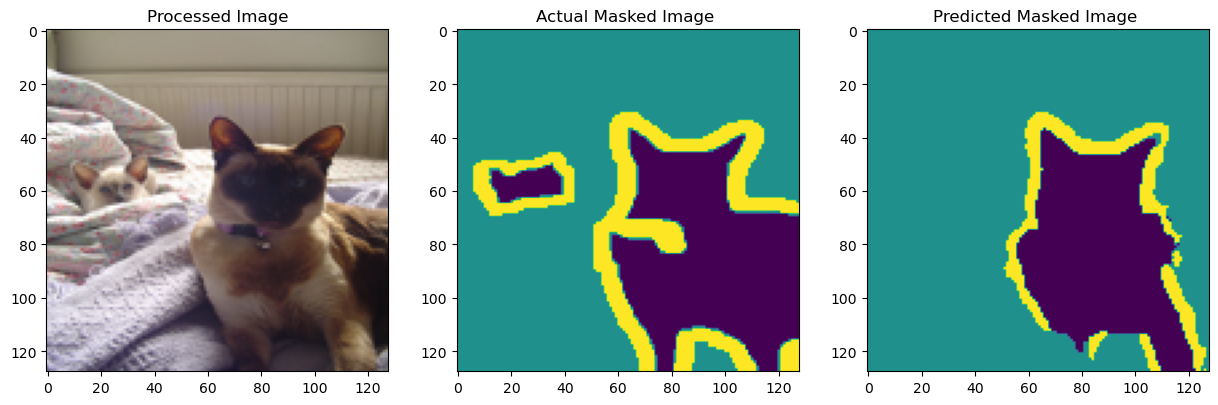

In [19]:
# Add any index to contrast the predicted mask with actual mask
index = 700
VisualizeResults(index)

## 6 - Save the model

In [151]:
from tensorflow import keras

unet.save("unet.h5")  # save the model to a file

## 7 - Create a new model that consists of the original model with an additional input layer

In [28]:
from tensorflow import keras

In [30]:
# Load the original model
original_model = unet

In [32]:
# Create a new Sequential model that starts with the new input layer and follows with the original layers
new_model = keras.Sequential([
    keras.layers.Input(shape=(128, 128, 3)),
    original_model
])

In [33]:
# Compile the new model
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
# Get the number of layers
num_layers = len(unet.layers)
num_layers2 = len(new_model.layers)

print('The unet model has', num_layers, 'layers')
print('The new model has', num_layers2, 'layers')

The unet model has 40 layers
The new model has 1 layers


In [38]:
# Load the original model
original_model = unet

In [44]:
unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

In [39]:
# Create a new input layer with the desired shape
input_layer = keras.layers.Input(shape=(128, 128, 3))

In [40]:
# Connect the new input layer to the original model
output_layer = original_model(input_layer)

In [41]:
# Create the new model with the additional input layer
new_model = keras.models.Model(inputs=input_layer, outputs=output_layer)

In [42]:
# Copy over the weights from the original model to the new model
for i in range(len(original_model.layers)):
    new_model.layers[i+1].set_weights(original_model.layers[i].get_weights())

ValueError: You called `set_weights(weights)` on layer "model" with a weight list of length 0, but the layer was expecting 68 weights. Provided weights: []...

In [ ]:
# Compile the new model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
from tensorflow import keras

# Load the model
model = unet

# Get the layer you want to set the weights for
layer = model.layers[0]

# Print the number of weights expected by the layer
print('Expected number of weights:', len(layer.weights))

# Print the length of the weight list
weights = []
print('Length of weight list:', len(weights))

# Set the weights of the layer
layer.set_weights(weights)

Expected number of weights: 0
Length of weight list: 0


In [45]:
from tensorflow import keras

# Load the model
model = unet

# Check if the model has been trained
if len(model.weights) == 0:
    print('The model has not been trained yet')
else:
    print('The model has been trained')

The model has been trained


In [46]:
len(unet.weights)

68

In [48]:
unet.weights[0].shape

TensorShape([3, 3, 3, 32])

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer

# Créer un nouveau modèle avec la couche d'entrée ajoutée
new_model = Sequential()
new_model.add(InputLayer(input_shape=(128, 128, 3)))

# Ajouter l'ancien modèle au nouveau modèle
new_model.add(Dense(unet.layers))

# Utiliser le nouveau modèle pour entraîner le réseau de neurones


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

In [83]:
# Get the number of layers
num_layers = len(unet.layers)
num_layers2 = len(new_model.layers)

print('The unet model has', num_layers, 'layers')
print('The new model has', num_layers2, 'layers')

The unet model has 40 layers
The new model has 1 layers


In [84]:
unet.layers

In [85]:
new_model.layers

In [86]:
new_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 128, 128, 3)       8643779   
                                                                 
Total params: 8,643,779
Trainable params: 8,641,795
Non-trainable params: 1,984
_________________________________________________________________


In [88]:
# add an output layer to unet

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

model = Sequential()
model.add(unet)
model.summary()

# Ajouter une couche de sortie Dense avec une activation softmax
model.add(Dense(units=3, activation='softmax'))

# Afficher la nouvelle structure du modèle
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 128, 128, 3)       8643779   
                                                                 
Total params: 8,643,779
Trainable params: 8,641,795
Non-trainable params: 1,984
_________________________________________________________________
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 128, 128, 3)       8643779   
                                                                 
 dense_1 (Dense)             (None, 128, 128, 3)       12        
                                                                 
Total params: 8,643,791
Trainable params: 8,641,807
Non-trainable params: 1,984
_________________________________________________________________


In [89]:
# Get the number of layers
num_layers = len(unet.layers)
num_layers2 = len(model.layers)

print('The unet model has', num_layers, 'layers')
print('The new model has', num_layers2, 'layers')

The unet model has 40 layers
The new model has 2 layers


In [90]:
model.layers

In [97]:
unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

In [107]:
new_inputs = Input(shape=(128, 128, 2))
x = Dense(6, activation='relu')(new_inputs)

In [108]:
x

<KerasTensor: shape=(None, 128, 128, 6) dtype=float32 (created by layer 'dense_6')>

In [99]:
unet.outputs

[<KerasTensor: shape=(None, 128, 128, 3) dtype=float32 (created by layer 'conv2d_19')>]

In [109]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

# Création d'un nouveau modèle avec une nouvelle input layer et la première couche du modèle existant
new_inputs = Input(shape=(128, 128, 2))
x = Dense(6, activation='relu')(new_inputs)
x = unet.layers[1](x)  # Ajout de la première couche existante
outputs = unet.layers[-1](x)
new_model = Model(inputs=new_inputs, outputs=outputs)

In [110]:
new_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 128, 128, 2)]     0         
                                                                 
 dense_7 (Dense)             (None, 128, 128, 6)       18        
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 128, 128, 3)       99        
                                                                 
Total params: 1,013
Trainable params: 1,013
Non-trainable params: 0
_________________________________________________________________


In [114]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Assume that we have an existing model with some layers
existing_model = unet

# Create a new input layer with the desired shape
new_input = Input(shape=(128, 128, 3))

# Iterate over the existing layers in the network
for layer in existing_model.layers:
    # Set the input of the first layer to the output of the new input layer
    if not hasattr(layer, 'Input'):
        layer.input = new_input
    else:
        layer.input_shape = (128, 128, 3)
    new_output = layer(new_input)
    new_input = new_output

# Create a new model with the updated layers
new_model = Model(inputs=new_input, outputs=existing_model(new_output))

AttributeError: Can't set the attribute "input", likely because it conflicts with an existing read-only @property of the object. Please choose a different name.

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Assume that we have an existing model with some layers
existing_model = unet

# Define the input shape
input_shape = (128, 128, 3)

# Create a new input layer
input_layer = Input(shape=input_shape)

# Get the output of the existing model
existing_output = existing_model.output

# Create a new dense layer
new_layer = Dense(32)(existing_output)

# Concatenate the input layer and the new layer
concat_layer = concatenate([input_layer, new_layer])

# Create a new model with the input layer and the existing layers
new_model = Model(inputs=input_layer, outputs=concat_layer)

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'") at layer "conv2d". The following previous layers were accessed without issue: []

In [92]:
unet.layers[-1]

In [96]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import InputLayer, Dense

# Charger votre modèle existant
model = unet

# Définir la nouvelle couche d'entrée
new_input_layer = InputLayer(input_shape=(128, 128, 3))

# Définir la nouvelle architecture pour le modèle avec la nouvelle couche d'entrée
new_model = Model(inputs=new_input_layer, outputs=model.layers[-1].output)

# Compiler le nouveau modèle
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Afficher la structure du nouveau modèle
new_model.summary()

ValueError: Found unexpected instance while processing input tensors for keras functional model. Expecting KerasTensor which is from tf.keras.Input() or output from keras layer call(). Got: <keras.engine.input_layer.InputLayer object at 0x7fe271ff2620>

In [152]:
model = keras.models.load_model("unet.h5")  # load the model from file

In [205]:
unet.layers.pop(0)

In [206]:
# Get the number of layers
num_layers = len(unet.layers)
num_layers2 = len(model.layers)

print('The unet model has', num_layers, 'layers')
print('The new model has', num_layers2, 'layers')

The unet model has 40 layers
The new model has 40 layers


In [207]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

In [128]:
new_input_layer = tf.keras.Input(batch_size= 1, shape=(128,128,3))
new_output_layer = model(new_input_layer)
new_model = tf.keras.Model(new_input_layer, new_output_layer)
new_model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_37 (InputLayer)       [(1, 128, 128, 3)]        0         
                                                                 
 model (Functional)          (None, 128, 128, 3)       8643779   
                                                                 
Total params: 8,643,779
Trainable params: 8,641,795
Non-trainable params: 1,984
_________________________________________________________________


In [131]:
new_model.get_layer(index=1).summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

In [132]:
# Get the number of layers
num_layers = len(unet.layers)
num_layers2 = len(new_model.get_layer(index=1).layers)

print('The unet model has', num_layers, 'layers')
print('The new model has', num_layers2, 'layers')

The unet model has 40 layers
The new model has 40 layers


In [133]:
unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

In [160]:
model = keras.models.load_model("unet.h5")  # load the model from file

In [158]:
from tensorflow import keras

input_shape = model.layers[0].input_shape[1:]
new_model = keras.models.Sequential()
for layer in model.layers[1:]:
    new_model.add(layer)

# copy the weights from the original model to the new model
for i in range(len(new_model.layers)):
    new_model.layers[i].set_weights(model.layers[i+1].get_weights())

# compile the new model with the same optimizer and loss function as the original model
new_model.compile(optimizer=model.optimizer, loss=model.loss)

# use the new model for inference


In [159]:
# Get the number of layers
num_layers = len(unet.layers)
num_layers2 = len(model.layers)

print('The unet model has', num_layers, 'layers')
print('The new model has', num_layers2, 'layers')

The unet model has 40 layers
The new model has 40 layers


In [162]:
from tensorflow import keras

model.layers.pop()  # remove the last layer from the model
new_model = keras.models.Sequential(model.get_layer)  # rebuild the model without the last layer


TypeError: The added layer must be an instance of class Layer. Received: layer=<bound method Model.get_layer of <keras.engine.functional.Functional object at 0x7fe24be53e20>> of type <class 'method'>.

In [177]:
model = keras.models.load_model("unet.h5")  # load the model from file

In [178]:
# Add a dense layer after the input layer
new_layer = Dense(32, activation='relu')
model.layers.insert(1, new_layer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

In [179]:
# Get the number of layers
num_layers = len(unet.layers)
num_layers2 = len(model.layers)

print('The unet model has', num_layers, 'layers')
print('The new model has', num_layers2, 'layers')

The unet model has 40 layers
The new model has 40 layers


In [181]:
model.updates

/tmp/ipykernel_1295/4199773474.py:1: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  model.updates


[]

In [186]:
model.layers.remove(model.layers[1])

In [187]:
# Get the number of layers
num_layers = len(unet.layers)
num_layers2 = len(model.layers)

print('The unet model has', num_layers, 'layers')
print('The new model has', num_layers2, 'layers')

The unet model has 40 layers
The new model has 40 layers


In [188]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

In [192]:
model.layers.pop(0)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 32  9248        ['conv2d[0][0]']                 
                                )                                                             